In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### 1.Dropping columns

In [8]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], axis=1, inplace = True)

In [10]:
df.shape

(10000, 10)

### 2.Select particular columns while reading 

In [ ]:
df_specific = pd.read_csv('churn.csv', usecols=['Gender', 'Age', 'Tenure', 'Balance'])

In [15]:
df_specific.head()

,Gender,Age,Tenure,Balance
0,Female,42,2,0.00
1,Female,41,1,83807.86
2,Female,42,8,159660.80
3,Female,39,1,0.00
4,Female,43,2,125510.82


### 3.Reading a part of the DataFrame

In [16]:
df_part = pd.read_csv("churn.csv",nrows=5000)

In [20]:
df_part.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# Another way
df_part1 = pd.read_csv("churn.csv",skiprows = 5000)
df_part1.head()

,5000,15710408,Cunningham,584,Spain,Female,38,3,0,2,1,1.1,4525.4,0.1
0,5001,15598695,Fields,834,Germany,Female,68,9,130169.27,2,0,1,93112.20,0
1,5002,15649354,Johnston,754,Spain,Male,35,4,0.00,2,1,1,9658.41,0
2,5003,15737556,Vasilyev,590,France,Male,43,7,81076.80,2,1,1,182627.25,1
3,5004,15671610,Hooper,740,France,Male,36,7,0.00,1,1,1,13177.40,0
4,5005,15625092,Colombo,502,Germany,Female,57,3,101465.31,1,1,0,43568.31,1


### 4.Sample data

In [23]:
df_sample = df.sample(n=1000)
df_sample.shape

(1000, 10)

In [25]:
df_sample1 = df.sample(frac=0.1)
df_sample1.shape

(1000, 10)

### 5.Checking the missing values

In [26]:
df.isnull().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 6.Adding missing values using loc and iloc
- These methods select rows and columns based on label,index
- loc: selects with label
- iloc:selects with index

In [30]:
missing_index = np.random.randint(10000, size= 20)

In [32]:
df.loc[missing_index, ['Balance','Geography']] = np.nan

In [33]:
df.iloc[missing_index, -1] = np.nan

In [34]:
df.isnull().sum()

Geography          20
Gender              0
Age                 0
Tenure              0
Balance            20
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             20
dtype: int64

### 7.Filling missing values

In [35]:
df['Geography'].value_counts()

France     5002
Germany    2502
Spain      2476
Name: Geography, dtype: int64

In [39]:
mode = df['Geography'].value_counts().index[0]
df['Geography'].fillna(value=mode,inplace=True)

In [44]:
df['Geography'].value_counts()

France     5022
Germany    2502
Spain      2476
Name: Geography, dtype: int64

In [46]:
mean = df['Balance'].mean()
df['Balance'].fillna(value=mean, inplace=True)

### 8.Dropping missing values

In [49]:
df.dropna(axis=0,how='any',inplace=True)

In [50]:
df.shape

(9980, 10)

### 9.Selecting rows based on conditions

In [53]:
France = df[(df['Geography'] == 'France') & df['Exited']==1]

In [55]:
France['Geography'].value_counts()

France    810
Name: Geography, dtype: int64

### 10. Describing the conditions with query

In [61]:
df2 = df.query('80000 <Balance < 100000')

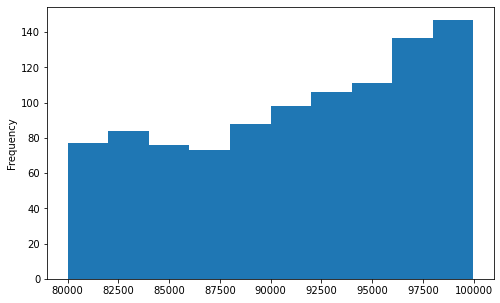

In [62]:
df2['Balance'].plot(kind='hist', figsize = (8,5))

### 11.Describing the conditions with isin

In [65]:
df[df['Tenure'].isin([4,6,9,10])][:5]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,Germany,Female,29,4,115046.74,4,1,0,119346.88,1.0
8,France,Male,44,4,142051.07,2,0,1,74940.50,0.0
10,France,Male,31,6,102016.72,2,0,0,80181.12,0.0
12,France,Female,34,10,0.00,2,1,0,26260.98,0.0
17,Spain,Female,24,9,0.00,2,1,1,14406.41,0.0


### 12.The groupby function

In [66]:
df.columns

Index(['Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [68]:
df[['Geography', 'Gender','Exited']].groupby(['Geography', 'Gender']).mean()

Exited
Geography Gender          
France    Female  0.203810
          Male    0.127505
Germany   Female  0.376154
          Male    0.277651
Spain     Female  0.212316
          Male    0.131124

### 13. Applying multiple aggregate functions with groupby

In [74]:
df[['Geography', 'Gender','Exited']].groupby(['Geography', 'Gender']).agg(['mean','count','max'])

Exited           
                      mean count  max
Geography Gender                     
France    Female  0.203810  2257  1.0
          Male    0.127505  2745  1.0
Germany   Female  0.376154  1191  1.0
          Male    0.277651  1311  1.0
Spain     Female  0.212316  1088  1.0
          Male    0.131124  1388  1.0

### 14.Applying different aggregate functions to different groups

In [78]:
df_summary = df[['Geography','Exited','Balance']].groupby('Geography')\
.agg(
 Number_of_churned_customers = pd.NamedAgg('Exited', 'sum'),
 Average_balance_of_customers = pd.NamedAgg('Balance', 'mean')
)

In [79]:
df_summary

,Number_of_churned_customers,Average_balance_of_customers
Geography,,
France,810.0,62085.382029
Germany,812.0,119745.015639
Spain,413.0,61843.114705


In [80]:
df_summary1 = df[['Geography','Exited','Balance']].groupby('Geography')\
.agg({'Exited':'sum', 'Balance':'mean'})
df_summary1.rename(columns={'Exited':'# of churned customers', 'Balance':'Average Balance of Customers'},inplace=True)
df_summary1

,# of churned customers,Average Balance of Customers
Geography,,
France,810.0,62085.382029
Germany,812.0,119745.015639
Spain,413.0,61843.114705


### 15.Reset the index

In [82]:
df_new = df[['Geography','Exited','Balance']].groupby(['Geography','Exited']).mean().reset_index()

In [83]:
df_new

,Geography,Exited,Balance
0,France,0.0,60325.600279
1,France,1.0,71192.795728
2,Germany,0.0,119439.083373
3,Germany,1.0,120381.746589
4,Spain,0.0,59706.998279
5,Spain,1.0,72513.352446


### 16. Reset the index with a drop


In [85]:
df[['Geography','Exited','Balance']].sample(n=5).reset_index(drop=True)

,Geography,Exited,Balance
0,France,1.0,132558.26
1,Germany,1.0,137239.17
2,Germany,0.0,111018.98
3,France,0.0,0.00
4,France,0.0,115961.58


### 17.Set a particular column as the index

In [86]:
df_new.set_index('Geography')

,Exited,Balance
Geography,,
France,0.0,60325.600279
France,1.0,71192.795728
Germany,0.0,119439.083373
Germany,1.0,120381.746589
Spain,0.0,59706.998279
Spain,1.0,72513.352446


### 18.Inserting a new columns

In [87]:
New_column = np.random.randint(10,size=6)

In [88]:
df_new['New_col'] = New_column

In [89]:
df_new

,Geography,Exited,Balance,New_col
0,France,0.0,60325.600279,7
1,France,1.0,71192.795728,6
2,Germany,0.0,119439.083373,1
3,Germany,1.0,120381.746589,6
4,Spain,0.0,59706.998279,5
5,Spain,1.0,72513.352446,8


In [98]:
New_col2 = np.random.randint(10,size=6)

In [99]:
# df_new.insert(0, 'Group', group)
# df_new

### 19.The Where function

In [101]:
df_new['Balance'] = df_new['Balance'].where(df_new['New_col'] >=6,0)

In [102]:
df_new

,Geography,Exited,Balance,New_col
0,France,0.0,60325.600279,7
1,France,1.0,71192.795728,6
2,Germany,0.0,0.000000,1
3,Germany,1.0,120381.746589,6
4,Spain,0.0,0.000000,5
5,Spain,1.0,72513.352446,8


### 20.Rank function

In [104]:
df_new['rank'] = df_new['Balance'].rank(method='first',ascending=False).astype('int')

In [105]:
df_new

,Geography,Exited,Balance,New_col,rank
0,France,0.0,60325.600279,7,4
1,France,1.0,71192.795728,6,3
2,Germany,0.0,0.000000,1,5
3,Germany,1.0,120381.746589,6,1
4,Spain,0.0,0.000000,5,6
5,Spain,1.0,72513.352446,8,2


### 21. Number of unique values in a column


In [107]:
df['Geography'].nunique()

3

In [111]:
df['Geography'].value_counts().size

3

### 22. Memory usage

In [112]:
df.memory_usage()

Index              344072
Geography           79840
Gender              79840
Age                 79840
Tenure              79840
Balance             79840
NumOfProducts       79840
HasCrCard           79840
IsActiveMember      79840
EstimatedSalary     79840
Exited              79840
dtype: int64

### 23. The category data type

In [113]:
df['Geography'] = df['Geography'].astype('category')

In [114]:
df.memory_usage()

Index              344072
Geography           10112
Gender              79840
Age                 79840
Tenure              79840
Balance             79840
NumOfProducts       79840
HasCrCard           79840
IsActiveMember      79840
EstimatedSalary     79840
Exited              79840
dtype: int64

### 24. Replacing values

In [124]:
df_new['New_col'].replace(1,'B1')

0     7
1     6
2    B1
3     6
4     5
5     8
Name: New_col, dtype: object

In [125]:
df_new['New_col'].replace({1:'B1',6:'B2'})

0     7
1    B2
2    B1
3    B2
4     5
5     8
Name: New_col, dtype: object

### 25. Drawing a histogram

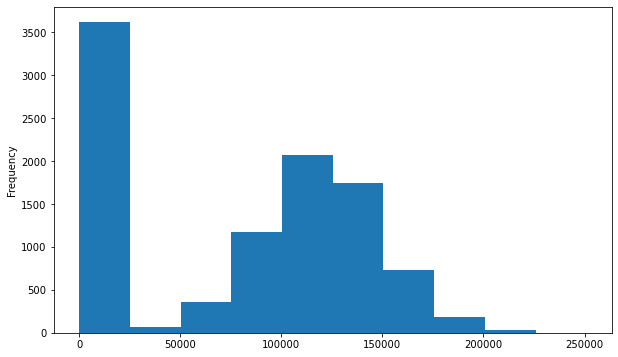

In [129]:
df['Balance'].plot(kind='hist',figsize=(10,6))

### 26. Reducing the decimal points of floats

In [130]:
df_new.round(1)

,Geography,Exited,Balance,New_col,rank
0,France,0.0,60325.6,7,4
1,France,1.0,71192.8,6,3
2,Germany,0.0,0.0,1,5
3,Germany,1.0,120381.7,6,1
4,Spain,0.0,0.0,5,6
5,Spain,1.0,72513.4,8,2


In [131]:
df_new

,Geography,Exited,Balance,New_col,rank
0,France,0.0,60325.600279,7,4
1,France,1.0,71192.795728,6,3
2,Germany,0.0,0.000000,1,5
3,Germany,1.0,120381.746589,6,1
4,Spain,0.0,0.000000,5,6
5,Spain,1.0,72513.352446,8,2


### 27. Changing the display options


In [132]:
pd.set_option("display.precision", 2)

In [133]:
df_new

,Geography,Exited,Balance,New_col,rank
0,France,0.0,60325.60,7,4
1,France,1.0,71192.80,6,3
2,Germany,0.0,0.00,1,5
3,Germany,1.0,120381.75,6,1
4,Spain,0.0,0.00,5,6
5,Spain,1.0,72513.35,8,2


### 28. Calculating the percentage change through a column


In [135]:
ser = pd.Series([4,5,6,6,7,7,8,7,234,34])
ser.pct_change()
#It is useful when calculating the percentage of change in a time series or sequential array of elements.

0      NaN
1     0.25
2     0.20
3     0.00
4     0.17
5     0.00
6     0.14
7    -0.12
8    32.43
9    -0.85
dtype: float64

### 29. Filtering based on strings


In [137]:
df_new['Names'] = ['Jack','Julia','Mike','Michael','Tim','Amber']

In [138]:
df_new[df_new.Names.str.startswith('Mi')]

,Geography,Exited,Balance,New_col,rank,Names
2,Germany,0.0,0.00,1,5,Mike
3,Germany,1.0,120381.75,6,1,Michael


### 30. Styling a dataframe


In [ ]:
df_new.style.hightlight_max(axis=0, color)